# 6.6: Sourcing & Analyzing Time Series Data

## This notebook has the following contents

## 01. Importing libraries, setting apikeys and Importing data
## 02. Subsetting, wrangling, and cleaning time-series data
## 03. Time-series analysis: decomposition
## 04. Testing for stationarity
## 05. Stationarizing the data
## 06. Checking autocorelation for the data

## 01. Importing libraries, setting apikeys and Importing data

In [1]:
import quandl
print("Quandl installed successfully!")

Quandl installed successfully!


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [3]:
# Configure API key 

quandl.ApiConfig.api_key = 'fnCGxNpznz9oyitxLQZK'

In [4]:
# defining path
path = r'C:\Users\hiron\Documents\191124_FIFA22_analysis'

In [5]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Bitcoin_Historical_Data.csv'), index_col = False)

In [6]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/08/2024,"71,347.9","69,358.0","71,442.1","69,110.5",55.11K,2.87%
1,04/07/2024,"69,360.4","68,897.3","70,285.8","68,849.4",46.99K,0.68%
2,04/06/2024,"68,890.6","67,830.5","69,632.0","67,467.2",41.48K,1.56%
3,04/05/2024,"67,830.6","68,498.7","68,692.2","66,023.3",88.97K,-0.97%
4,04/04/2024,"68,496.5","65,968.4","69,238.8","65,096.3",100.30K,3.84%


In [7]:
df.shape

(5014, 7)

## 02. Subsetting, wrangling, and cleaning time-series data

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [9]:
data = df[['Date','Price']]

In [10]:
data.head()

,Date,Price
0,2024-04-08,71347.9
1,2024-04-07,69360.4
2,2024-04-06,68890.6
3,2024-04-05,67830.6
4,2024-04-04,68496.5


In [11]:
# Set the Date column as the index
data2 = data.set_index('Date')

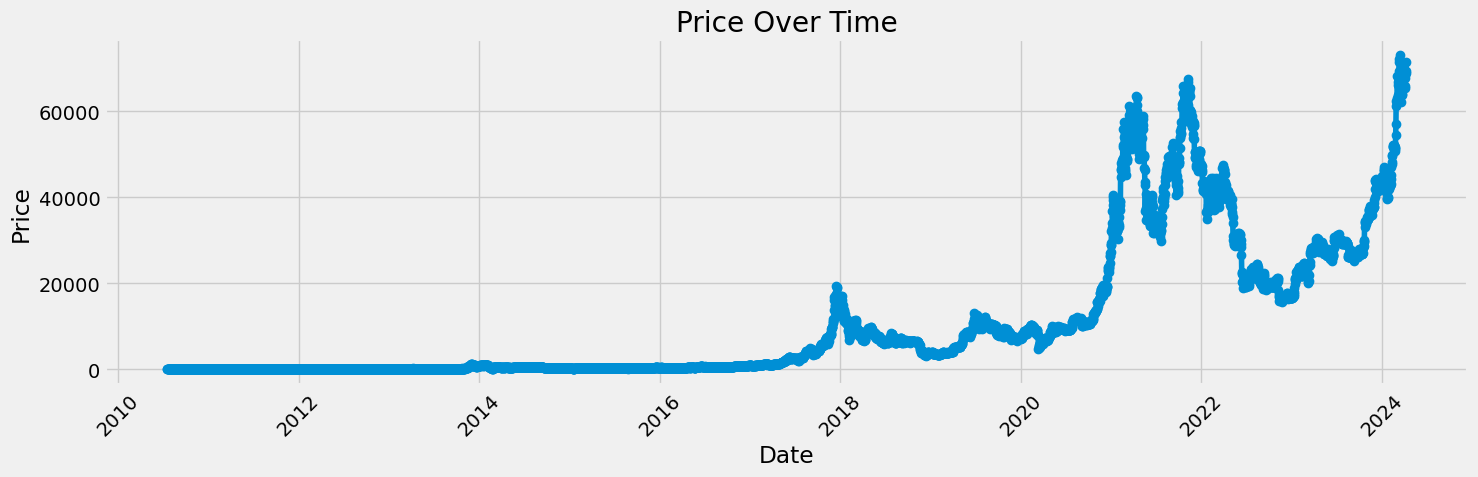

In [12]:
# Plot the data
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(data2.index, data2['Price'], marker='o')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Since the conditions similar to today were first achieved in around 2016 ( that means institutional adoption of bitcoin ) and also it being seen as a store of value, we will take data ony after 2016 as a subset

In [13]:
data_sub = df.loc[(df['Date'] >= '2016-01-01')]

In [14]:
data_f = data_sub[['Date','Price']]

In [15]:
# Set the Date column as the index
data_f = data_f.set_index('Date')

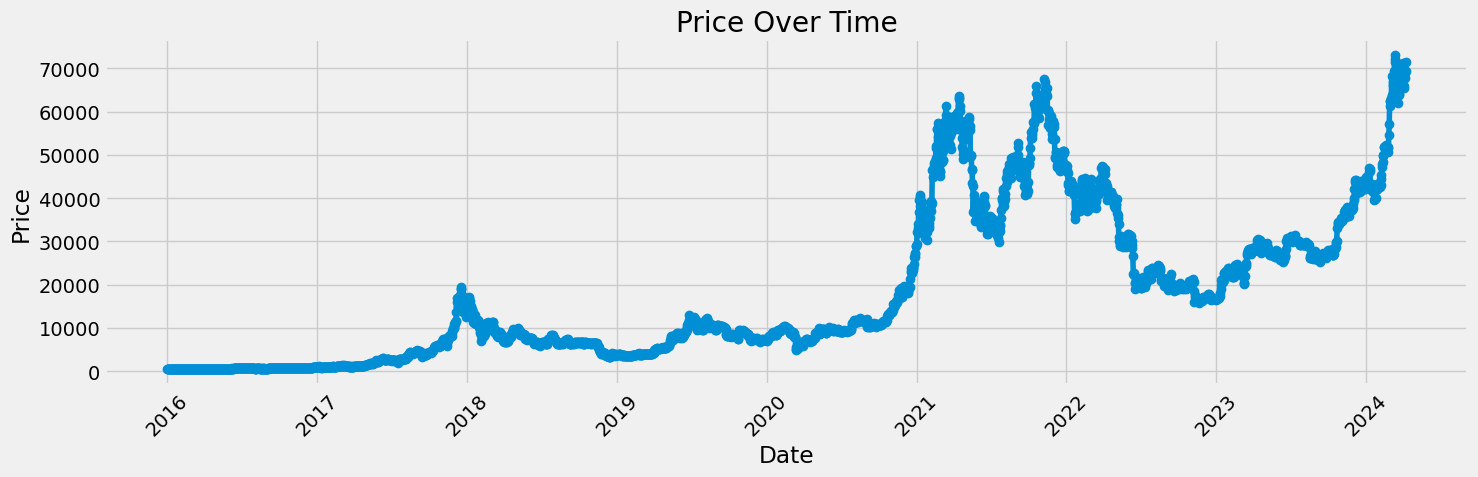

In [16]:
# Plot the data
plt.figure(figsize=(15, 5), dpi=100)
plt.plot(data_f.index, data_f['Price'], marker='o')
plt.title('Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
data_final = data_sub[['Date','Price']]

In [19]:
#removing duplicates
data_final.drop_duplicates(subset=['Date', 'Price'])

,Date,Price
0,2024-04-08,71347.9
1,2024-04-07,69360.4
2,2024-04-06,68890.6
3,2024-04-05,67830.6
4,2024-04-04,68496.5
...,...,...
3016,2016-01-05,431.2
3017,2016-01-04,433.3
3018,2016-01-03,430.7
3019,2016-01-02,433.7


In [20]:
# Check for missing values (you shouldn't have any)

data_final.isnull().sum()

Date     0
Price    0
dtype: int64

In [21]:
# Check for duplicates

dups = data_final.duplicated()
dups.sum()

# No dups!

0

In [22]:
# Set the Date column as the index
sub = data_final.set_index('Date')

## 03.Time-series analysis: decomposition

In [24]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub, model='additive')

In [25]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 20, 9

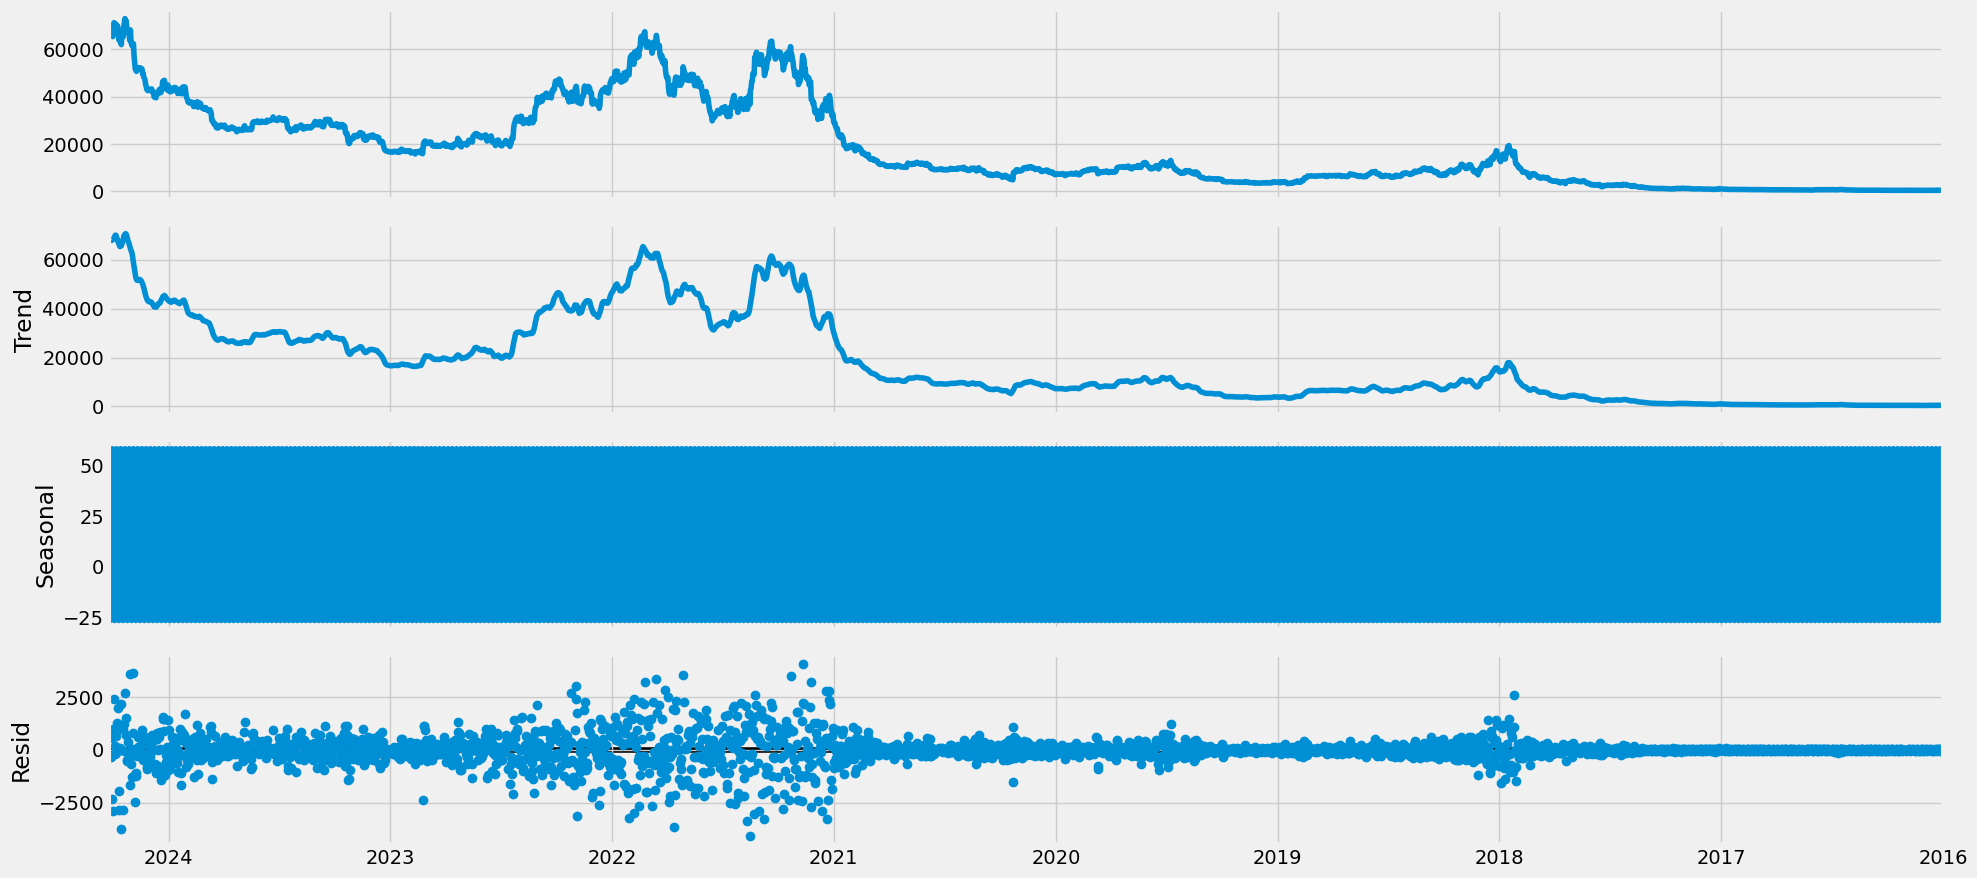

In [26]:
# Plot the separate components

decomposition.plot()
plt.show()

## Sorting from oldest date and plotting again

In [27]:
# Sort DataFrame by index (date)
sub = sub.sort_index()

In [28]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sub, model='additive')

In [29]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 20, 9

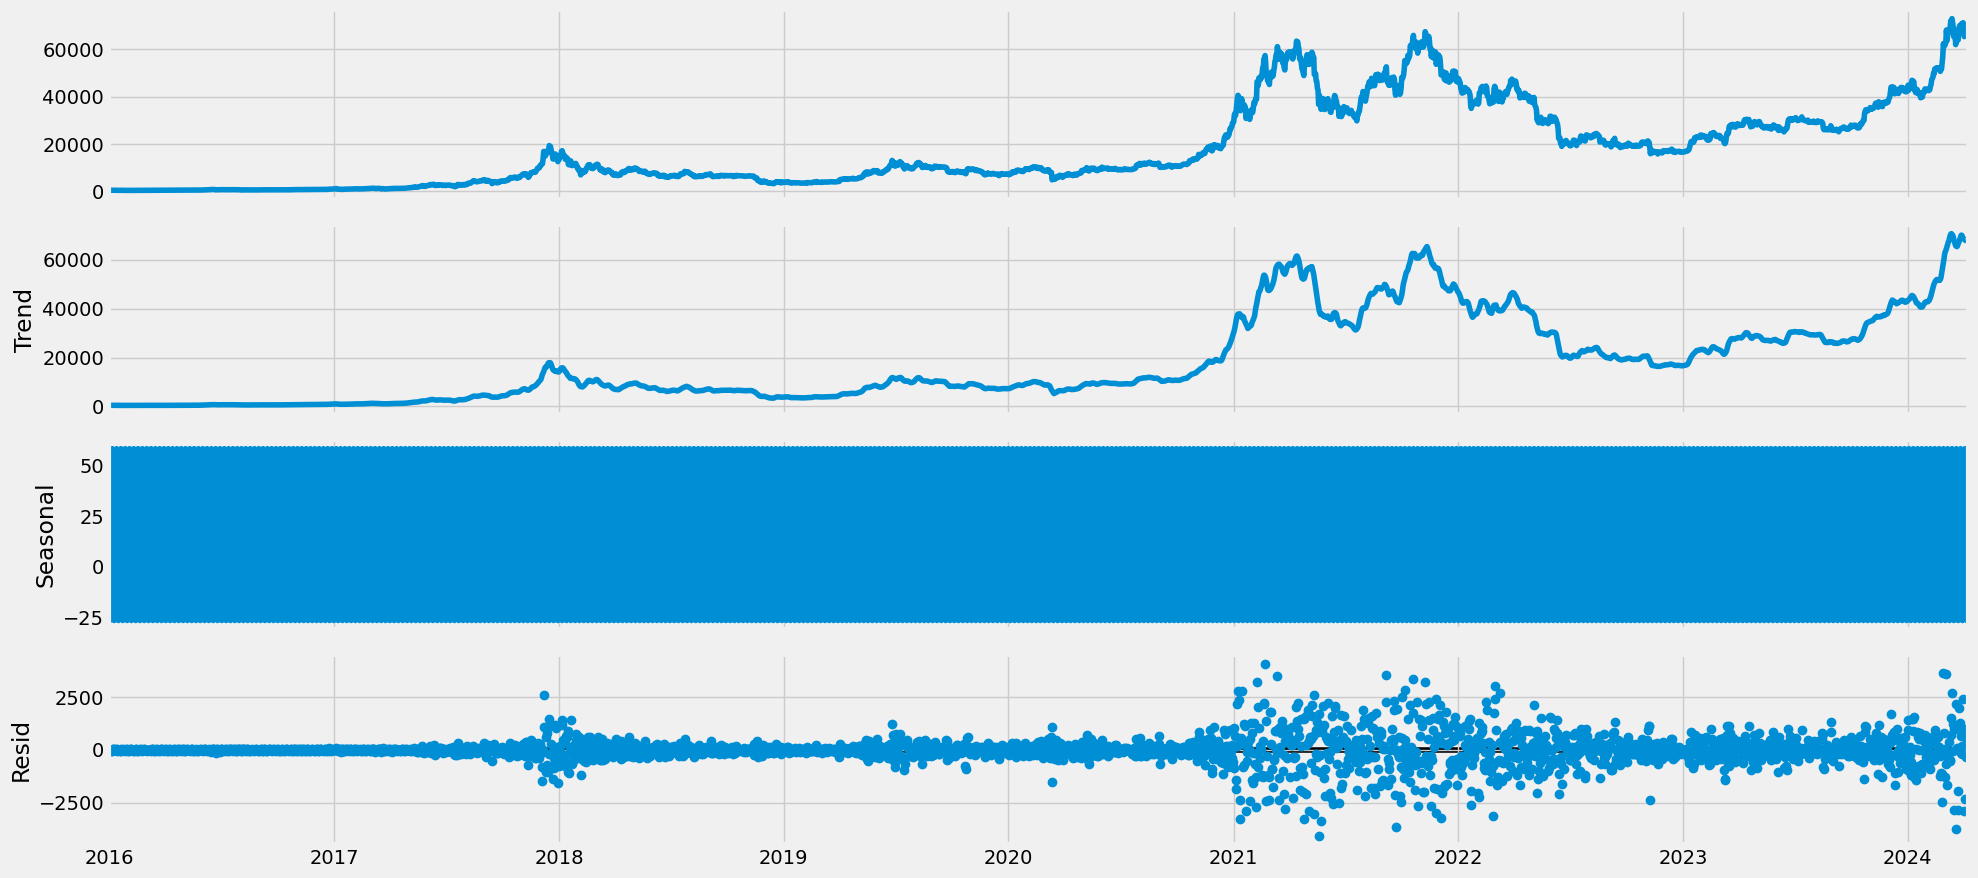

In [30]:
# Plot the separate components

decomposition.plot()
plt.show()

## Interpretation 


### 1. Observed Component (Top Panel)
This is the original time series data (Bitcoin prices over time). It shows the overall pattern, including trends and fluctuations.
Interpretation: The observed data appears to follow a cyclical pattern with significant peaks and troughs, consistent with Bitcoin's historical price volatilityosition model.

### 2. Trend Component (Second Panel)
The trend represents the underlying direction of the time series after removing short-term fluctuations and seasonality.
Interpretation: The trend shows major price surges around 2017 and 2021, followed by declines. This aligns with Bitcoin's major bull runs and corrections.
Assessment: The trend appears smooth and captures the long-term price movements well, suggesting that the decomposition is working as intended.


### 3. Seasonal Component (Third Panel)
The seasonal component captures repeating patterns or cycles within a fixed period (e.g., daily, monthly, yearly).
Interpretation: The seasonal component seems consistent over time, with values oscillating between positive and negative ranges. This indicates recurring short-term patterns in Bitcoin prices.
Assessment: A clear seasonal pattern may not always be prominent in financial data like Bitcoin prices. However, if this component is consistent across time, it suggests some periodicity exists in the data.


### 4. Residual Component (Bottom Panel)
The residual represents what remains after removing the trend and seasonal components—essentially, the noise or unexplained variation.
Interpretation: The residuals appear scattered around zero with no obvious pattern, which is ideal.
Assessment: If residuals are randomly distributed without trends or seasonality, it indicates a good fit of the decomposition model.

## 04. Testing for stationarity

In [31]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub['Price'])

Dickey-Fuller Stationarity test:
Test Statistic                   -0.480268
p-value                           0.895810
Number of Lags Used              29.000000
Number of Observations Used    2991.000000
Critical Value (1%)              -3.432538
Critical Value (5%)              -2.862507
Critical Value (10%)             -2.567285
dtype: float64


### The Dickey-Fuller test results indicate that the time series is not stationary:
The test statistic (-0.480268) is higher than all critical values (-3.43, -2.86, -2.57), meaning the null hypothesis of non-stationarity cannot be rejected.
The p-value (0.895810) is much greater than 0.05, further confirming a lack of stationarity.
A non-stationary series implies trends or seasonality are present, which aligns with the observed Bitcoin price data.

## 05. Stationarizing the Data

In [33]:
data_diff = sub - sub.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [34]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test

In [35]:
data_diff.columns

Index(['Price'], dtype='object')

In [36]:
data_diff.head()

,Price
Date,
2016-01-02,-0.3
2016-01-03,-3.0
2016-01-04,2.6
2016-01-05,-2.1
2016-01-06,-0.4


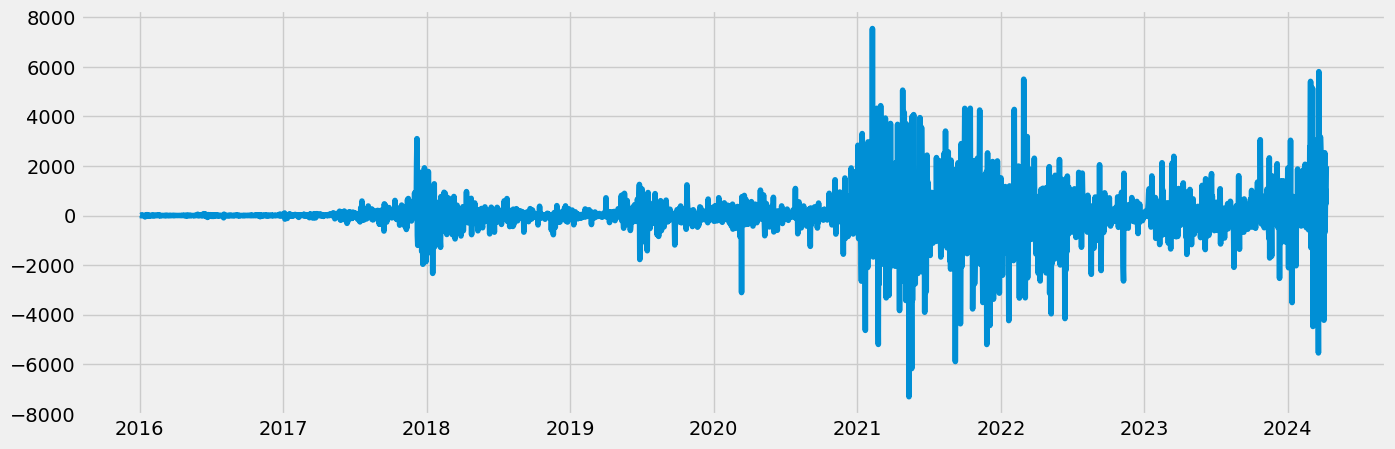

In [37]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [38]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.864521e+00
p-value                        1.452544e-14
Number of Lags Used            2.800000e+01
Number of Observations Used    2.991000e+03
Critical Value (1%)           -3.432538e+00
Critical Value (5%)           -2.862507e+00
Critical Value (10%)          -2.567285e+00
dtype: float64


### The new Dickey-Fuller test results indicate that the time series is stationary:
The test statistic (-8.864521) is much lower than all critical values (-3.43, -2.86, -2.57), meaning the null hypothesis of non-stationarity is rejected.
The p-value (1.45e-14) is extremely small, confirming strong evidence for stationarity.
This suggests that the data no longer has trends or seasonality, likely due to preprocessing (e.g., differencing).
A stationary series is now suitable for time series modeling techniques like ARIMA.
The decomposition chart aligns with this result, as the residuals appear random and centered around zero.

### In Practice: if Bitcoin prices trend upward over time, differencing removes that trend and focuses on daily price changes (increases or decreases). This helps identify patterns in fluctuations rather than absolute price levels.

## 06. Checking autocorelation for the data

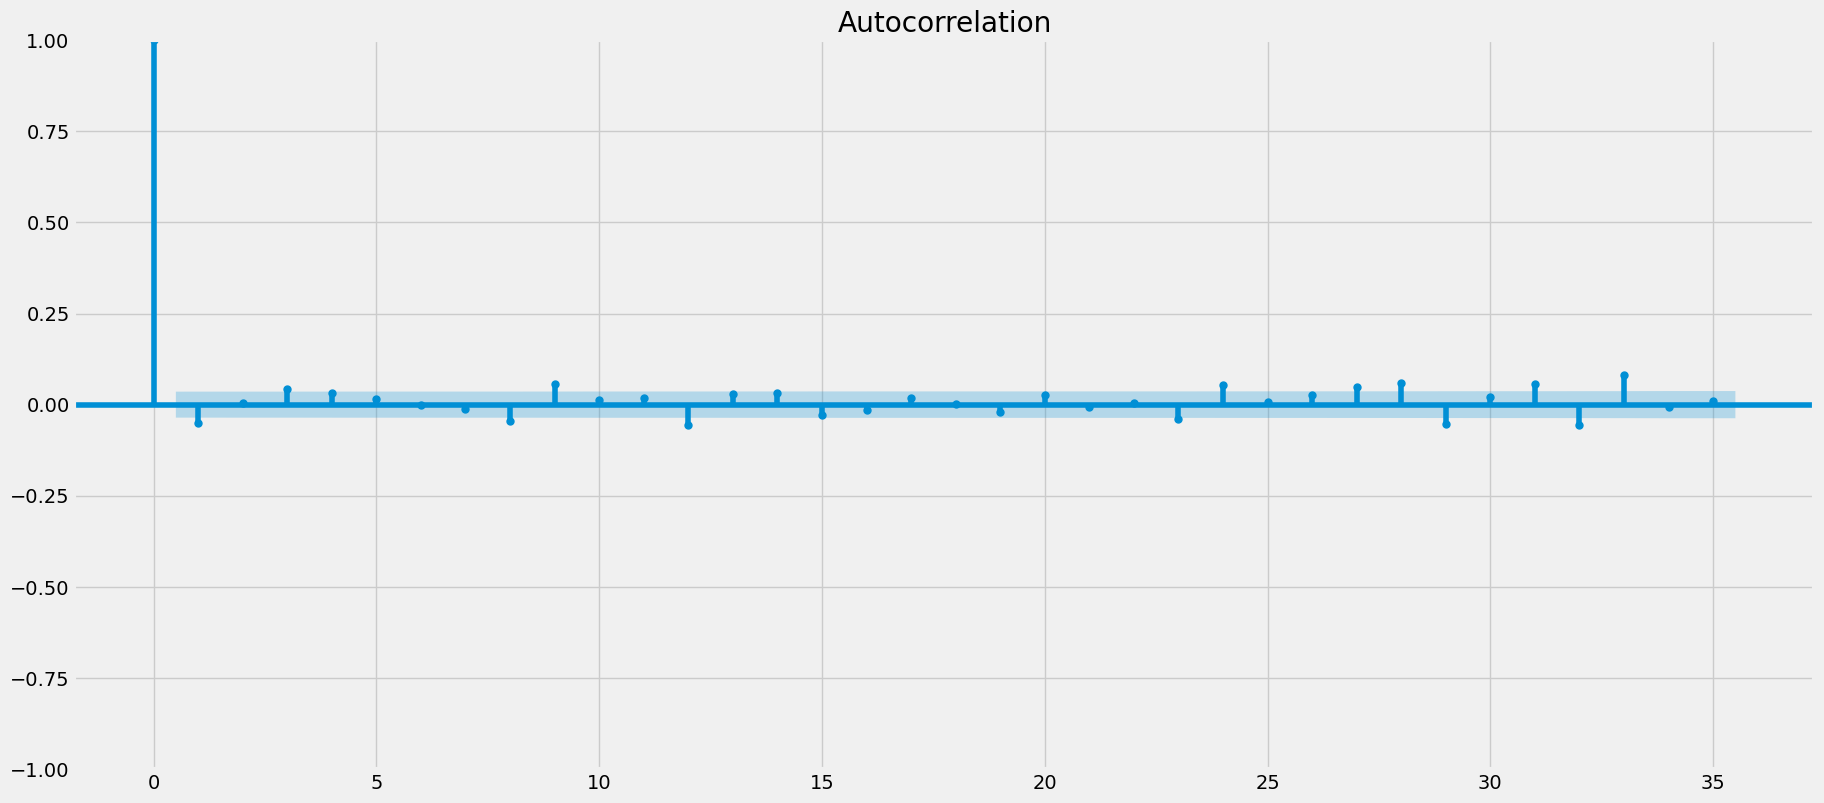

In [39]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()

### The autocorrelation plot indicates the following:
The lag-0 correlation is 1 (as expected), showing perfect correlation with itself.
All other lags have very low autocorrelation values, mostly within the confidence intervals (blue shaded area), suggesting that the differenced data has minimal serial correlation and is likely stationary.
This result supports that the data is now suitable for time series modeling, as no significant autocorrelation remains.